# Project 4 : West Nile Virus Prediction

## Datasets and Libraries import

In [ ]:
#!pip install nltk
from nltk.corpus import stopwords

import pandas as pd
from tqdm import tqdm
import json, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import f1_score, classification_report

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer


from sklearn.pipeline import Pipeline
import missingno as msno

from datetime import date
import calendar

import geopy.distance

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc,confusion_matrix,RocCurveDisplay
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,roc_curve,auc,confusion_matrix,RocCurveDisplay

from sklearn.metrics import f1_score, classification_report

In [4]:
train = pd.read_csv('train.csv').drop_duplicates() 
weather = pd.read_csv('weather.csv').drop_duplicates() 

In [6]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [7]:
train.tail()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0
10505,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8,1,0


In [ ]:
train.shape

In [ ]:
weather.head()

In [ ]:
weather.tail()

In [ ]:
weather.shape

In [ ]:
weather.columns

In [ ]:
weather.info()

## Data Cleasing and Preprocessing

In [ ]:
# Convert 'Date' column to be datetime type
train['Date'] = pd.to_datetime(train['Date'] , format = '%Y-%m-%d')
weather['Date'] = pd.to_datetime(weather['Date'] , format = '%Y-%m-%d')

In [9]:
# Extract year and month to new columns
train['month'] = pd.DatetimeIndex(train['Date']).month
train['year'] = pd.DatetimeIndex(train['Date']).year

In [17]:
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

station_1_lat = 41.995
station_1_long = -87.933
station_2_lat = 41.786
station_2_long = -87.752

# add new column 'Latitude' to weather_df where Station = 1 
weather.loc[weather['Station'] == 1, 'Lat_Station'] = station_1_lat
weather.loc[weather['Station'] == 2, 'Lat_Station'] = station_2_lat

weather.loc[weather['Station'] == 1, 'Long_Station'] = station_1_long
weather.loc[weather['Station'] == 2, 'Long_Station'] = station_2_long


In [19]:
# Create Function to get the closest weather station (1 or 2) by calculateing distance betwen trap and weather station.
station1 = (41.995, -87.933) #Trap Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT
station2 = (41.786, -87.752) #Trap Station 2: CHICAGO MIDWAY INTL ARPT
def get_station(lat, long):
    dist1 = geopy.distance.distance((lat, long), station1).km # calculate distance to station 1
    dist2 = geopy.distance.distance((lat, long), station2).km # calculate distance to station 2
    return 1 if dist1 < dist2 else 2

In [20]:
# Create function to convert latitude and longitude to float data type with 3 decimal places.
def convert_lat_long(df):
    df['Latitude'] = df['Latitude'].astype(float).round(3)
    df['Longitude'] = df['Longitude'].astype(float).round(3)
    print(f" New Column after convert Lat/Long: {df.shape[0]} and {df.shape[1]} rows")

In [21]:
# Add the closest weather station to train dataset
convert_lat_long(train)
train['Station'] = [get_station(train.loc[i,'Latitude'],train.loc[i,'Longitude']) for i in train.index]

 New Column after convert Lat/Long: 9693 and 14 rows


In [22]:
# merging the train data and weather datasets, defined as df.
df = pd.merge(train,weather, on=['Date','Station'], how='left')
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat_Station,Long_Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.955,-87.801,9,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,41.995,-87.933
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.955,-87.801,9,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,41.995,-87.933
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.995,-87.769,9,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,41.995,-87.933
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974,-87.825,8,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,41.995,-87.933
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974,-87.825,8,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,41.995,-87.933


### Explore features

In [23]:
df['AvgSpeed'].value_counts() 

6.0     538
3.7     424
7.1     386
6.7     290
7.2     288
       ... 
7.7      15
5.7      15
10.7     13
12.7      9
14.1      7
Name: AvgSpeed, Length: 84, dtype: int64

In [24]:
df['ResultDir'].value_counts()

23    703
24    681
13    641
19    552
25    504
5     478
29    464
17    435
21    406
6     388
30    366
8     347
7     343
16    275
4     272
9     269
22    266
3     262
10    242
36    186
20    185
18    157
35    156
34    153
11    132
15    131
27    109
14    108
26     98
2      94
31     88
32     58
12     42
1      39
33     37
28     26
Name: ResultDir, dtype: int64

In [25]:
df['ResultSpeed'].value_counts() 

2.1     456
3.5     435
6.2     352
4.1     302
6.4     300
       ... 
9.3      24
3.1      22
4.8      15
12.2      9
11.5      1
Name: ResultSpeed, Length: 86, dtype: int64

In [26]:
df['SeaLevel'].value_counts()

29.98    749
30.05    635
29.95    507
29.87    463
30.04    420
29.89    407
30.09    401
29.91    385
30.11    385
29.82    334
29.81    322
29.96    317
29.93    314
30.00    296
29.92    285
29.83    267
29.99    216
30.13    178
29.94    176
29.86    172
29.97    167
29.76    164
29.90    159
30.07    157
30.08    147
30.03    135
30.06    127
29.74    126
29.84    126
30.33    120
30.01    107
30.10     86
29.85     85
30.17     80
30.12     71
29.68     65
29.62     48
30.18     44
29.75     42
30.14     42
29.80     40
30.21     40
29.79     38
29.88     37
29.78     35
30.22     34
29.71     32
29.73     30
29.70     28
30.15     13
30.16     12
29.60      9
29.63      9
29.59      7
29.77      2
Name: SeaLevel, dtype: int64

In [27]:
df['StnPressure'].value_counts()

29.34    1108
29.23     485
29.29     468
29.26     450
29.18     430
29.39     426
29.33     389
29.28     379
29.21     377
29.44     368
29.11     313
29.40     296
29.41     291
29.31     248
29.20     241
29.36     235
29.47     217
29.42     209
29.16     209
29.38     203
29.24     190
29.17     189
29.27     166
29.13     145
29.46     143
29.14     121
29.25     110
29.32     108
29.08     106
29.45      81
29.51      80
29.10      79
29.65      78
28.97      76
29.06      74
29.03      65
29.30      62
29.15      53
29.12      53
29.59      42
29.48      42
29.55      40
29.22      36
M          35
29.49      34
29.01      30
29.37      28
29.35      25
29.19      22
29.09      13
28.89       9
28.91       9
28.95       7
Name: StnPressure, dtype: int64

In [28]:
df['PrecipTotal'].value_counts()

0.00    5383
  T      833
0.01     298
0.06     291
0.23     215
0.36     197
0.83     193
0.02     166
0.20     134
0.03     127
0.16     125
0.84     109
0.92     105
0.13      90
0.88      81
0.12      79
0.09      77
0.59      76
0.11      74
0.17      71
0.08      65
0.87      65
1.31      58
0.58      54
0.39      53
0.70      52
0.24      51
1.55      51
0.19      49
0.33      43
0.14      41
0.04      40
0.79      40
0.50      39
0.27      35
0.52      35
1.19      34
3.97      28
0.42      25
M         24
0.44      22
0.46      22
0.89      21
0.95      19
0.05       3
Name: PrecipTotal, dtype: int64

In [29]:
df['SnowFall'].value_counts() # next action : drop column as contains only M,0.0,T where m = missing, t = trace.

M      6585
0.0    3038
  T      70
Name: SnowFall, dtype: int64

In [30]:
df['Water1'].value_counts() # next action : drop column as all same value ' M'

M    9693
Name: Water1, dtype: int64

In [31]:
df['Depth'].value_counts() # next action : drop column as containing only just M and 0

M    6585
0    3108
Name: Depth, dtype: int64

In [32]:
df['CodeSum'].value_counts() # next action : drop column as high null

                         5475
RA                        656
RA BR                     565
TS TSRA RA BR             392
BR                        292
RA BR HZ                  254
HZ                        248
BR HZ                     245
TSRA RA BR                237
TSRA BR                   174
TSRA RA                   157
VCTS                      126
RA DZ BR                  119
TS                        116
TSRA                       99
FG BR HZ                   80
TS TSRA RA VCTS            77
TS TSRA RA BR HZ VCTS      75
TS BR                      54
TSRA RA BR VCTS            51
TS TSRA RA FG BR HZ        33
TSRA BR HZ VCTS            32
TSRA HZ                    31
TSRA RA DZ BR HZ           31
TS TSRA BR                 28
TS TSRA BR HZ              22
TSRA BR HZ                 22
DZ BR                       2
Name: CodeSum, dtype: int64

In [33]:
df['Sunset'].value_counts() # next action : drop column as mostly contain high '-'

-       6585
1931     249
1928     219
1911     172
1854     134
1809     117
1929     113
1918     112
1930     107
1923     102
1904     101
1926      95
1924      80
1917      74
1845      57
1832      57
1843      54
1903      53
1915      52
1819      51
1925      51
1840      51
1729      50
1746      50
1756      50
1927      46
1907      45
1913      44
1839      44
1758      44
1748      43
1744      43
1822      43
1760      42
1919      41
1848      39
1805      37
1858      36
1755      35
1856      35
1735      33
1837      31
1742      25
1827      25
1920      21
1734      21
1826      20
1835      19
1916      16
1921      13
1824      12
1902       3
1720       1
Name: Sunset, dtype: int64

In [34]:
df['Sunrise'].value_counts() # next action : drop column as mostly contain high '-'

-       6585
0416     239
0445     172
0459     134
0417     121
0528     117
0438     112
0418     110
0426     103
0451     101
0419      93
0440      67
0429      60
0505      57
0514      57
0433      56
0506      54
0452      53
0442      52
0509      51
0522      51
0432      51
0431      51
0427      51
0535      50
0541      50
0552      50
0449      45
0533      44
0444      44
0510      44
0542      43
0540      43
0520      43
0532      42
0437      41
0423      39
0424      39
0503      39
0530      37
0456      36
0457      35
0536      35
0425      34
0420      34
0547      33
0511      31
0543      25
0517      25
0421      23
0548      21
0518      20
0512      19
0428      15
0519      12
0453       3
0557       1
Name: Sunrise, dtype: int64

In [35]:
df['Cool'].value_counts()

 0    1784
12     953
15     708
 7     639
 8     562
14     547
10     513
 6     504
11     482
13     465
 5     449
 9     443
17     402
16     343
 1     183
 2     183
18     126
21     116
 4     112
19     111
 3      40
22      28
Name: Cool, dtype: int64

In [36]:
df['Heat'].value_counts()

0     8190
1      374
9      199
4      176
2      128
10     109
5      106
11      99
13      99
8       63
3       52
14      33
12      28
15      21
7       16
Name: Heat, dtype: int64

In [37]:
df['WetBulb'].value_counts()

62    841
69    816
70    713
71    693
65    581
72    526
67    481
64    471
63    462
68    395
59    357
57    355
58    336
60    282
61    271
74    261
75    232
66    218
76    184
47    181
51    162
49    136
54    135
50    124
52    112
73    106
56     95
55     93
M      35
53     26
46     13
Name: WetBulb, dtype: int64

In [38]:
df['DewPoint'].value_counts()

67    587
69    585
55    567
59    556
70    523
63    511
54    502
60    491
62    428
56    424
66    415
51    386
52    342
61    333
68    331
57    314
58    309
65    277
50    237
73    184
46    167
43    159
71    142
44    138
49    125
53    112
47    106
64     91
38     78
48     69
42     56
40     42
41     33
72     31
45     29
39     13
Name: DewPoint, dtype: int64

In [39]:
df['Depart'].value_counts() # next action : drop column as mostly containing 'M'

M      6585
 7      286
 5      284
 8      211
-2      202
10      186
 4      176
 3      164
-6      156
-3      130
-1      129
-7      129
 2      126
 1      114
-8      104
 0       93
-4       87
-10      72
 9       71
-5       70
 6       58
14       58
-12      55
12       52
18       50
-9       25
16       20
Name: Depart, dtype: int64

In [40]:
df['Tmax'].value_counts()

86    809
91    754
82    754
83    753
81    652
84    580
85    512
90    462
87    343
78    319
70    301
92    288
88    286
74    257
77    238
89    235
80    220
75    207
79    198
68    167
59    143
71    126
62    125
97    116
72    106
66    103
61     84
67     81
58     70
76     69
64     67
94     65
96     54
69     35
63     35
57     33
93     25
60     21
Name: Tmax, dtype: int64

In [41]:
df['Tmin'].value_counts()

69    1325
70     658
71     547
60     513
63     507
73     468
67     435
58     378
57     376
72     371
66     368
61     360
62     356
64     338
68     303
56     241
65     238
50     227
48     208
74     183
46     173
55     170
59     147
54     144
51     142
75     116
47     109
44      65
53      51
45      33
49      32
52      29
79      28
41      21
76      20
43      13
Name: Tmin, dtype: int64

In [42]:
df['Tavg'].value_counts()

77    953
80    708
72    639
73    562
79    547
75    513
71    504
76    482
78    465
70    449
74    443
82    402
64    374
81    343
65    281
56    199
67    183
66    183
61    176
63    128
83    126
86    116
69    112
84    111
55    109
60    106
52     99
54     99
57     63
62     52
68     40
51     33
87     28
53     28
50     21
58     16
Name: Tavg, dtype: int64

In [43]:
# drop the unneeded columns as they contains high missing value
df = df.drop(['Street','Block','SnowFall','Water1','Depth','CodeSum','Sunset','Sunrise','Depart','Lat_Station','Long_Station','Address','Latitude','Longitude','AddressAccuracy','AddressNumberAndStreet'], axis=1)

In [48]:
# Replace the value contains "M" on 26 June in "WetBulb" by station 1, by the numberic value of 'Wetbulb' from station 2
df['WetBulb'][(df['Station'] == 1) & (df['Date']=='2009-06-26')] = 67
df['WetBulb'][(df['Station'] == 1) & (df['Date']=='2009-06-26')]

C:\Users\yodchan\AppData\Local\Temp\ipykernel_41648\1435796205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WetBulb'][(df['Station'] == 1) & (df['Date']=='2009-06-26')] = 67


3704    67
3705    67
3706    67
3707    67
3720    67
3721    67
3722    67
3727    67
3728    67
3729    67
3730    67
3731    67
3732    67
3745    67
3746    67
3751    67
3752    67
3753    67
3754    67
3755    67
3756    67
3757    67
3758    67
3759    67
3760    67
3764    67
3766    67
3767    67
3768    67
3769    67
3770    67
3771    67
3793    67
3794    67
3795    67
Name: WetBulb, dtype: object

In [49]:
# Replace the value contains "M" on 26 June in "StnPressure" by station 1, by the numberic value of 'StnPressure' from station 2
df['StnPressure'][(df['Station'] == 1) & (df['Date']=='2009-06-26')] = 29.20
df['StnPressure'][(df['Station'] == 1) & (df['Date']=='2009-06-26')]

C:\Users\yodchan\AppData\Local\Temp\ipykernel_41648\631682161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StnPressure'][(df['Station'] == 1) & (df['Date']=='2009-06-26')] = 29.20


3704    29.2
3705    29.2
3706    29.2
3707    29.2
3720    29.2
3721    29.2
3722    29.2
3727    29.2
3728    29.2
3729    29.2
3730    29.2
3731    29.2
3732    29.2
3745    29.2
3746    29.2
3751    29.2
3752    29.2
3753    29.2
3754    29.2
3755    29.2
3756    29.2
3757    29.2
3758    29.2
3759    29.2
3760    29.2
3764    29.2
3766    29.2
3767    29.2
3768    29.2
3769    29.2
3770    29.2
3771    29.2
3793    29.2
3794    29.2
3795    29.2
Name: StnPressure, dtype: object

In [50]:
df['WetBulb'] = pd.to_numeric(df['WetBulb'])

In [51]:
df['StnPressure'] = pd.to_numeric(df['StnPressure'])

In [52]:
df['SeaLevel'] = pd.to_numeric(df['SeaLevel'])

In [53]:
df['PrecipTotal'] = df['PrecipTotal'].replace(['  T','M',],0)

In [54]:
df['PrecipTotal'] = pd.to_numeric(df['PrecipTotal'])

In [55]:
df['Tavg'] = pd.to_numeric(df['Tavg'])

In [56]:
df['AvgSpeed'] = pd.to_numeric(df['AvgSpeed'])

In [57]:
df['Heat'] = pd.to_numeric(df['Heat'])

In [58]:
df['Cool'] = pd.to_numeric(df['Cool'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 9692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9693 non-null   datetime64[ns]
 1   Species       9693 non-null   object        
 2   Trap          9693 non-null   object        
 3   NumMosquitos  9693 non-null   int64         
 4   WnvPresent    9693 non-null   int64         
 5   month         9693 non-null   int64         
 6   year          9693 non-null   int64         
 7   Station       9693 non-null   int64         
 8   Tmax          9693 non-null   int64         
 9   Tmin          9693 non-null   int64         
 10  Tavg          9693 non-null   int64         
 11  DewPoint      9693 non-null   int64         
 12  WetBulb       9693 non-null   int64         
 13  Heat          9693 non-null   int64         
 14  Cool          9693 non-null   int64         
 15  PrecipTotal   9693 non-null   float64 

In [60]:
df.describe()

,NumMosquitos,WnvPresent,month,year,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.00000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000,9693.000000
mean,10.210564,0.051893,7.691943,2009.704632,1.679356,81.638708,63.645517,72.86939,59.359022,64.592696,0.929124,8.798514,0.139620,29.292060,29.959657,5.958950,17.819148,7.477334
std,13.138722,0.221823,1.085403,2.344622,0.466748,8.390200,7.670957,7.59767,7.921670,6.786177,2.767327,5.806459,0.347275,0.118298,0.118728,2.901229,9.127654,2.535740
min,1.000000,0.000000,5.000000,2007.000000,1.000000,57.000000,41.000000,50.00000,38.000000,46.000000,0.000000,0.000000,0.000000,28.890000,29.590000,0.100000,1.000000,2.100000
25%,2.000000,0.000000,7.000000,2007.000000,1.000000,78.000000,59.000000,70.00000,54.000000,61.000000,0.000000,5.000000,0.000000,29.210000,29.870000,4.000000,9.000000,5.800000
50%,4.000000,0.000000,8.000000,2009.000000,2.000000,83.000000,65.000000,74.00000,60.000000,65.000000,0.000000,9.000000,0.000000,29.290000,29.960000,5.800000,19.000000,7.100000
75%,13.000000,0.000000,8.000000,2011.000000,2.000000,87.000000,69.000000,78.00000,66.000000,70.000000,0.000000,13.000000,0.090000,29.380000,30.050000,7.800000,24.000000,9.200000
max,50.000000,1.000000,10.000000,2013.000000,2.000000,97.000000,79.000000,87.00000,73.000000,76.000000,15.000000,22.000000,3.970000,29.650000,30.330000,15.400000,36.000000,16.300000


In [61]:
df.head()

,Date,Species,Trap,NumMosquitos,WnvPresent,month,year,Station,Tmax,Tmin,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,1,0,5,2007,1,88,60,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,CULEX RESTUANS,T002,1,0,5,2007,1,88,60,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,CULEX RESTUANS,T007,1,0,5,2007,1,88,60,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,1,0,5,2007,1,88,60,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,CULEX RESTUANS,T015,4,0,5,2007,1,88,60,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5


In [ ]:
train.groupby('year')['NumMosquitos'].agg(['sum'])

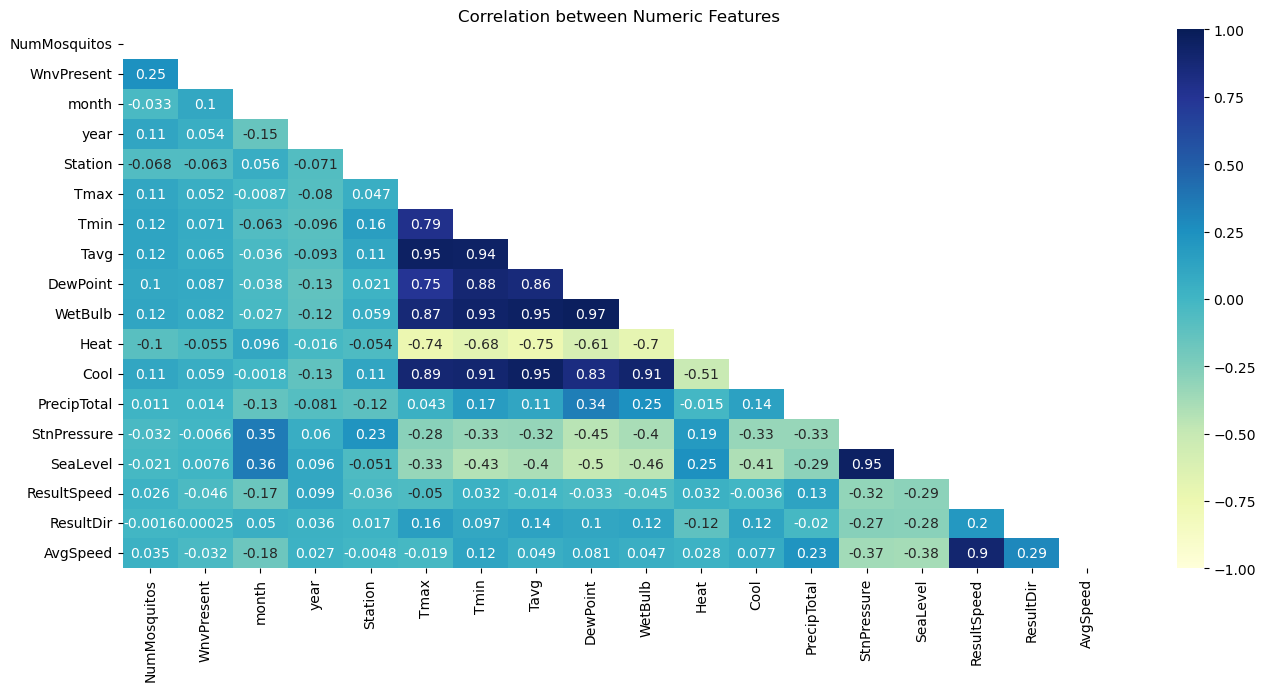

In [62]:
plt.figure(figsize = (16, 7))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='YlGnBu', vmin=-1, vmax=1, annot=True, mask=mask);
plt.title("Correlation between Numeric Features");

In [63]:
#Seeing the correlation of features with NumMosquito
pd.DataFrame(df.corr(numeric_only=True)['NumMosquitos'].sort_values(ascending = False)) #drop 'AvgSpeed','ResultSpeed','PrecipTotal','ResultSpeed','PrecipTotal','ResultDir','SeaLevel','StnPressure','Station','Tmin','Tmax'

,NumMosquitos
NumMosquitos,1.000000
WnvPresent,0.248242
Tavg,0.119683
Tmin,0.117632
WetBulb,0.115868
year,0.112786
Cool,0.108943
Tmax,0.107684
DewPoint,0.100673
AvgSpeed,0.034573


In [64]:
#Seeing the correlation of features with NumMosquito
pd.DataFrame(df.corr(numeric_only=True)['WnvPresent'].sort_values(ascending = False))

,WnvPresent
WnvPresent,1.000000
NumMosquitos,0.248242
month,0.101115
DewPoint,0.087043
WetBulb,0.082379
Tmin,0.070538
Tavg,0.065243
Cool,0.059307
year,0.053875
Tmax,0.051986


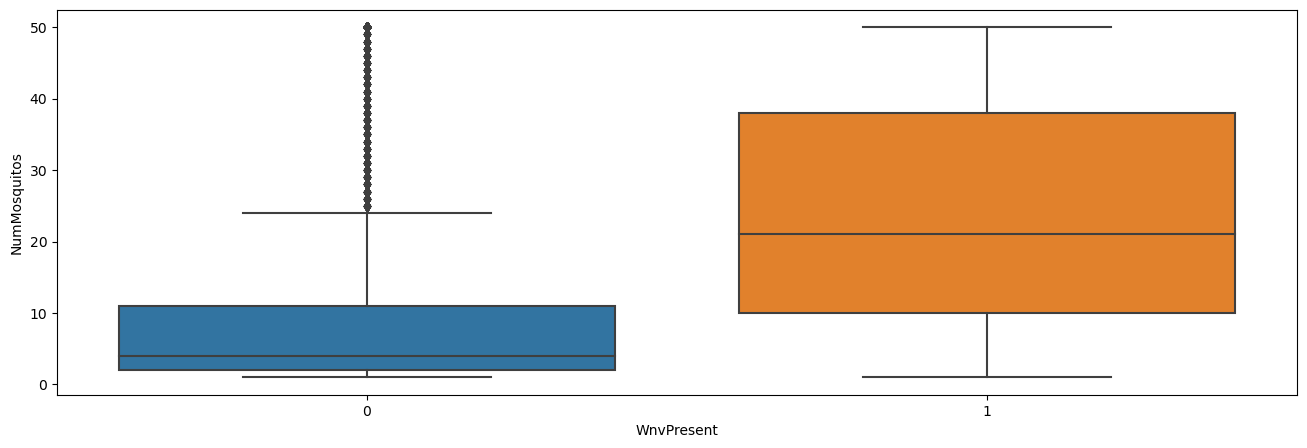

In [65]:
plt.figure(figsize = (16, 5))
sns.boxplot(data=df,x='WnvPresent', y='NumMosquitos');

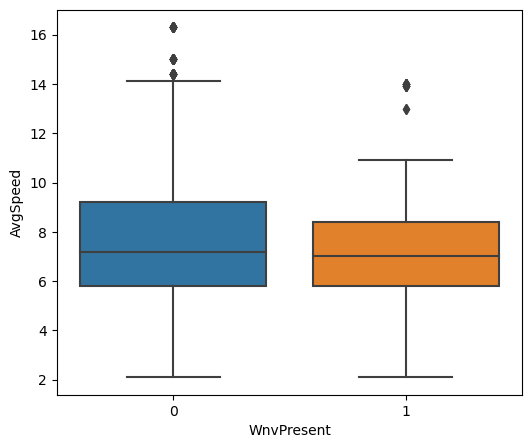

In [66]:
plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='AvgSpeed');

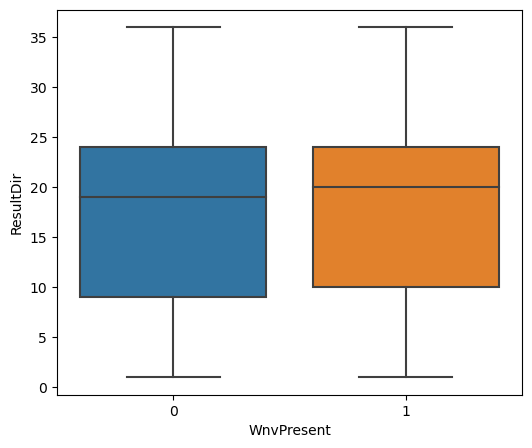

In [67]:
plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='ResultDir');

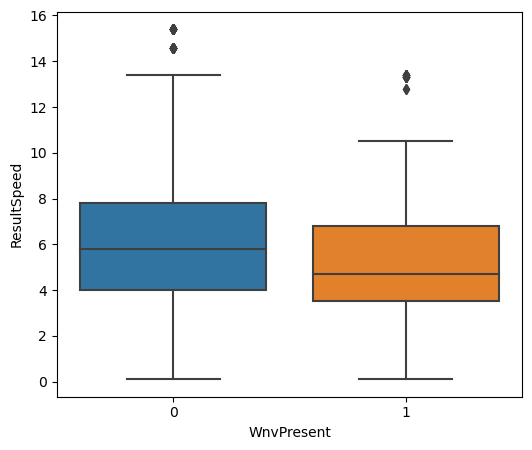

In [68]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='ResultSpeed');

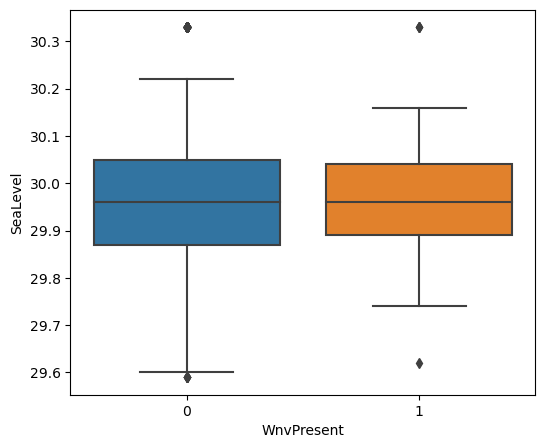

In [69]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='SeaLevel');

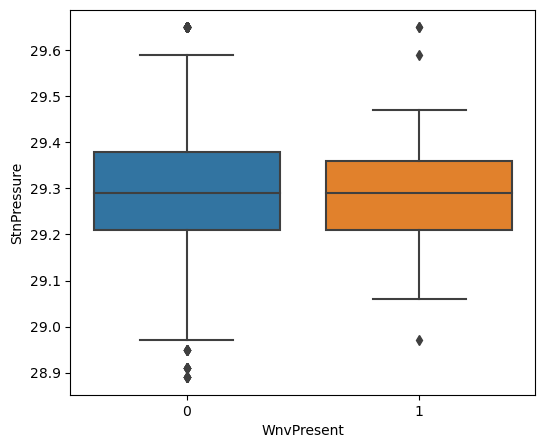

In [70]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='StnPressure');

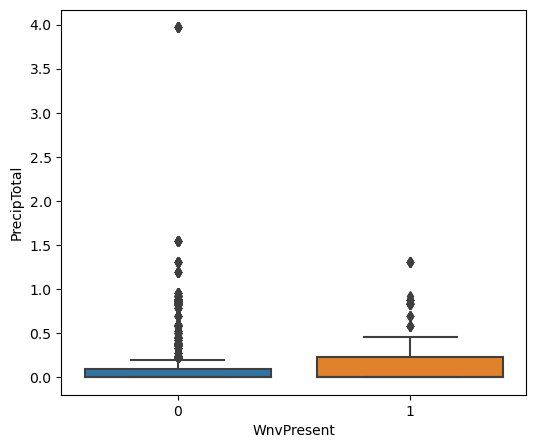

In [71]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='PrecipTotal');

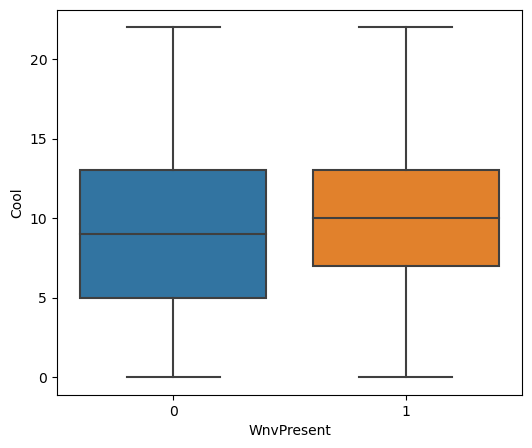

In [72]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='Cool');

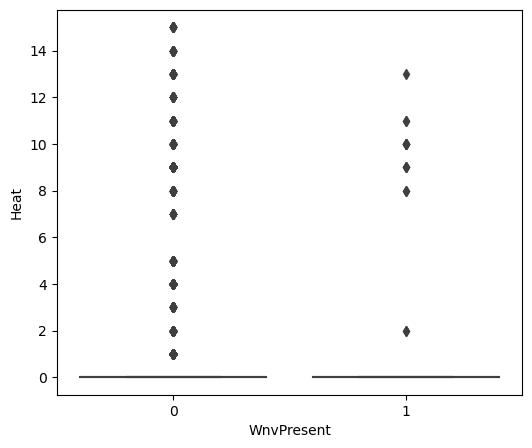

In [73]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='Heat');

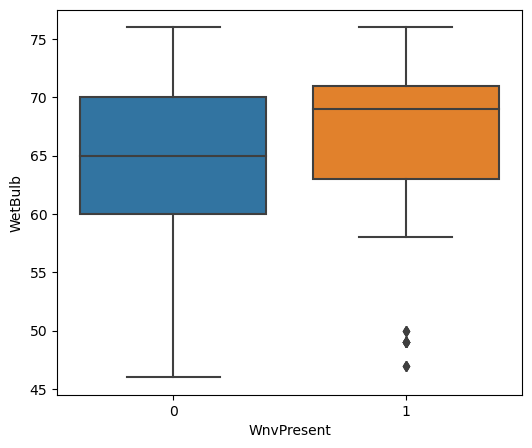

In [74]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='WetBulb');

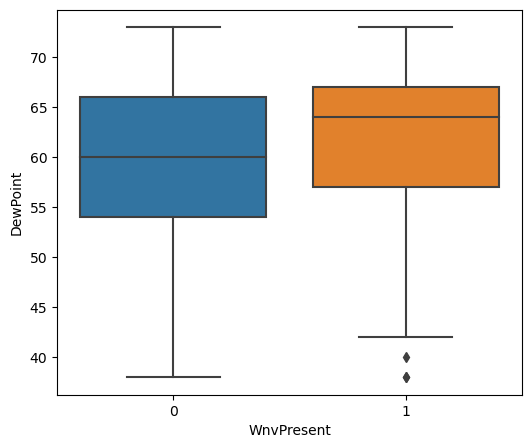

In [75]:

plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='DewPoint');

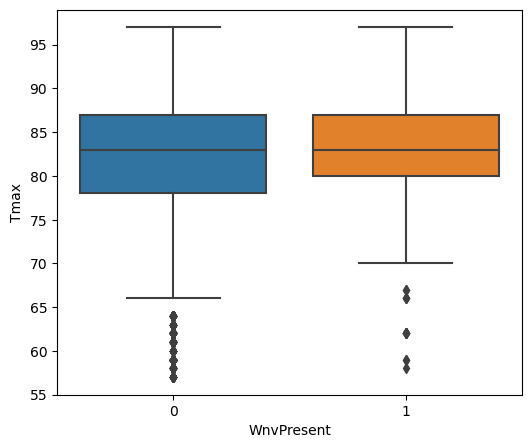

In [76]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='Tmax');

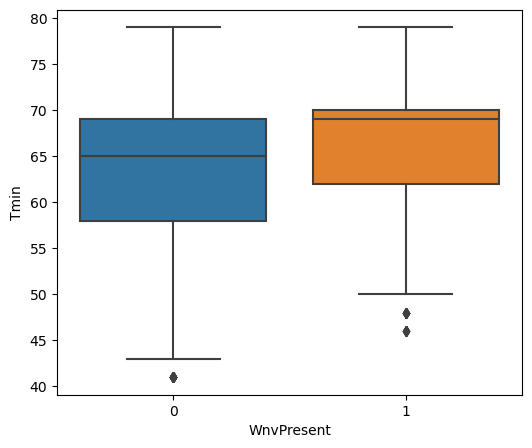

In [77]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='Tmin');

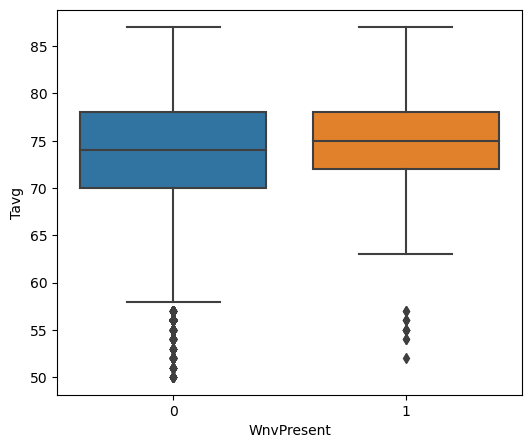

In [78]:


plt.figure(figsize = (6, 5))
sns.boxplot(data=df,x='WnvPresent', y='Tavg');

In [79]:
df_drop_1 = df.drop(['AvgSpeed','ResultSpeed','ResultSpeed','ResultDir','Station','Tmin','Tmax','Date','PrecipTotal', 'StnPressure', 'SeaLevel','Cool','Heat'], axis=1)
df_drop_1.head()

,Species,Trap,NumMosquitos,WnvPresent,month,year,Tavg,DewPoint,WetBulb
0,CULEX PIPIENS/RESTUANS,T002,1,0,5,2007,74,58,65
1,CULEX RESTUANS,T002,1,0,5,2007,74,58,65
2,CULEX RESTUANS,T007,1,0,5,2007,74,58,65
3,CULEX PIPIENS/RESTUANS,T015,1,0,5,2007,74,58,65
4,CULEX RESTUANS,T015,4,0,5,2007,74,58,65


In [80]:
# dummify the string columns
df_final = pd.get_dummies(data=df_drop_1, columns = ['Species','Trap','month','year'], drop_first = True)
df_final.head()

,NumMosquitos,WnvPresent,Tavg,DewPoint,WetBulb,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,...,Trap_T900,Trap_T903,month_6,month_7,month_8,month_9,month_10,year_2009,year_2011,year_2013
0,1,0,74,58,65,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,74,58,65,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,74,58,65,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,74,58,65,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,74,58,65,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_final.columns

Index(['NumMosquitos', 'WnvPresent', 'Tavg', 'DewPoint', 'WetBulb',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS',
       ...
       'Trap_T900', 'Trap_T903', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'year_2009', 'year_2011', 'year_2013'],
      dtype='object', length=154)

In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 9692
Columns: 154 entries, NumMosquitos to year_2013
dtypes: int64(5), uint8(149)
memory usage: 1.8 MB


In [83]:
features = [col for col in df_final.columns if col !=['WnvPresent']]

In [84]:
features

['NumMosquitos',
 'WnvPresent',
 'Tavg',
 'DewPoint',
 'WetBulb',
 'Species_CULEX PIPIENS',
 'Species_CULEX PIPIENS/RESTUANS',
 'Species_CULEX RESTUANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Species_CULEX TERRITANS',
 'Trap_T002',
 'Trap_T003',
 'Trap_T004',
 'Trap_T005',
 'Trap_T006',
 'Trap_T007',
 'Trap_T008',
 'Trap_T009',
 'Trap_T011',
 'Trap_T012',
 'Trap_T013',
 'Trap_T014',
 'Trap_T015',
 'Trap_T016',
 'Trap_T017',
 'Trap_T018',
 'Trap_T019',
 'Trap_T025',
 'Trap_T027',
 'Trap_T028',
 'Trap_T030',
 'Trap_T031',
 'Trap_T033',
 'Trap_T034',
 'Trap_T035',
 'Trap_T036',
 'Trap_T037',
 'Trap_T039',
 'Trap_T040',
 'Trap_T043',
 'Trap_T044',
 'Trap_T045',
 'Trap_T046',
 'Trap_T047',
 'Trap_T048',
 'Trap_T049',
 'Trap_T050',
 'Trap_T051',
 'Trap_T054',
 'Trap_T054C',
 'Trap_T060',
 'Trap_T061',
 'Trap_T062',
 'Trap_T063',
 'Trap_T065',
 'Trap_T066',
 'Trap_T067',
 'Trap_T069',
 'Trap_T070',
 'Trap_T071',
 'Trap_T072',
 'Trap_T073',
 'Trap_T074',
 'Trap_T075',
 'Tra

In [85]:
# seperate features(factors) and Target Variable

X = df_final[features]
X = X.drop(['WnvPresent','NumMosquitos'], axis=1)
y = df_final['WnvPresent']


#Split training set and test set with default test size = 0.25

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)


# standardzie all the numberic features

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)

In [86]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)

Xsm_train,ysm_train = sm.fit_resample(X_train_scaled,y_train)

In [87]:
def evaluate(model):
    pred_test = model.predict(X_val_scaled)
    probs_train = model.predict_proba(Xsm_train)[:,1]
    probs_test = model.predict_proba(X_val_scaled)[:,1]
    auc_train = round(roc_auc_score(ysm_train, probs_train), 4)
    auc_test = round(roc_auc_score(y_val, probs_test), 4)
    fpr_train, tpr_train, _ = roc_curve(ysm_train, probs_train)
    fpr_test, tpr_test, _ = roc_curve(y_val, probs_test)

    ## plot
    plt.figure(figsize=(12, 5))
    
    ## confusion matrix
    ax = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(confusion_matrix(y_val, pred_test)).plot(ax=ax)
    plt.grid(False); plt.title('Confusion Matrix for test')

    ## ROC curve
    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train).plot(ax=ax, name='train')
    RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test).plot(ax=ax, name='test')
    plt.plot((0,1), (0,1)); plt.title(f'ROC curve (AUC: {auc_test})')
    plt.show()

## Random Forests

In [88]:
rf = RandomForestClassifier()

rf_params  ={'n_estimators':
             [50,100,150,200],
            'max_depth':[None,2,3,4,5,6]}


grid = GridSearchCV(rf,param_grid = rf_params,cv=5)
grid.fit(Xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [89]:
grid.best_score_

0.9684538506111281

In [90]:
grid.best_params_

{'max_depth': None, 'n_estimators': 150}

In [91]:
grid.score(Xsm_train,ysm_train) # Train Accuracy

0.9917319408181027

In [92]:
grid.score(X_val_scaled,y_val)

0.9344059405940595

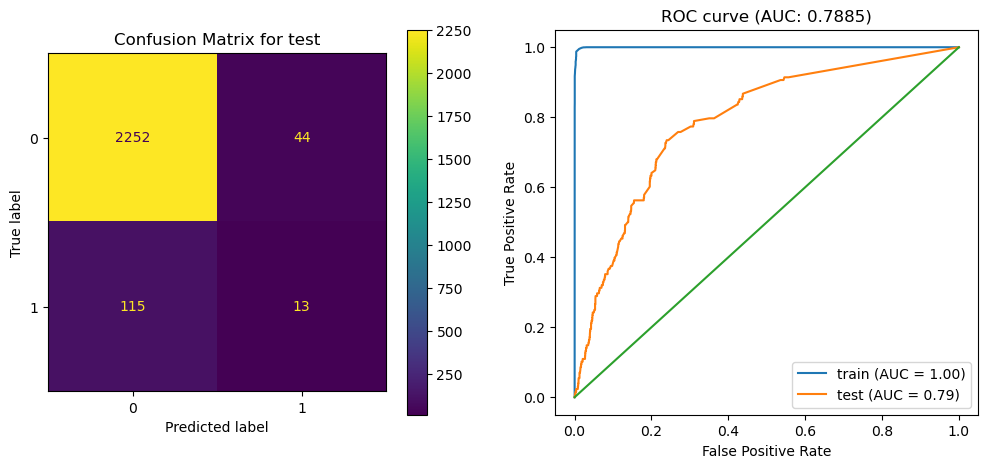

In [93]:
evaluate(grid)

In [94]:
print(classification_report(y_val,grid.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2296
           1       0.23      0.10      0.14       128

    accuracy                           0.93      2424
   macro avg       0.59      0.54      0.55      2424
weighted avg       0.91      0.93      0.92      2424



## AdaBoost

In [95]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.datasets import make_classification


In [96]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2))
ada.fit(Xsm_train,ysm_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2))

In [97]:
ada.score(Xsm_train,ysm_train) # Training Accuracy

0.9646069045546852

In [98]:
ada.score(X_val_scaled,y_val) #Validation Accuracy

0.9368811881188119

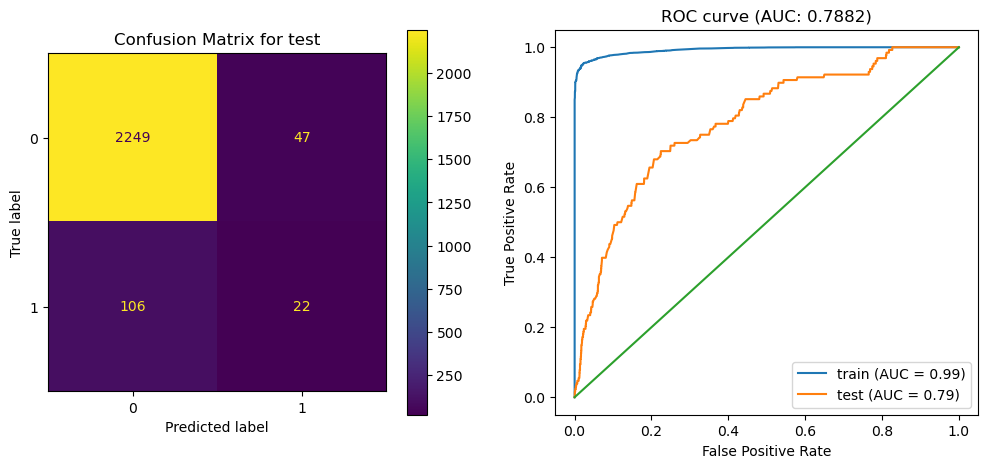

In [99]:
evaluate(ada)

In [100]:
print(classification_report(y_val,ada.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2296
           1       0.32      0.17      0.22       128

    accuracy                           0.94      2424
   macro avg       0.64      0.58      0.60      2424
weighted avg       0.92      0.94      0.93      2424



## Bagging

In [101]:
from sklearn.ensemble import BaggingClassifier

In [102]:
# Instantiate BaggingClassifier.
bag = BaggingClassifier(estimator=DecisionTreeClassifier(),random_state = 42)

# Fit BaggingClassifier.
bag.fit(Xsm_train,ysm_train)

# Score BaggingClassifier.
bag.score(Xsm_train,ysm_train)

0.9884682332463012

In [103]:
bag.score(X_val_scaled,y_val) #Validation Accuracy

0.9249174917491749

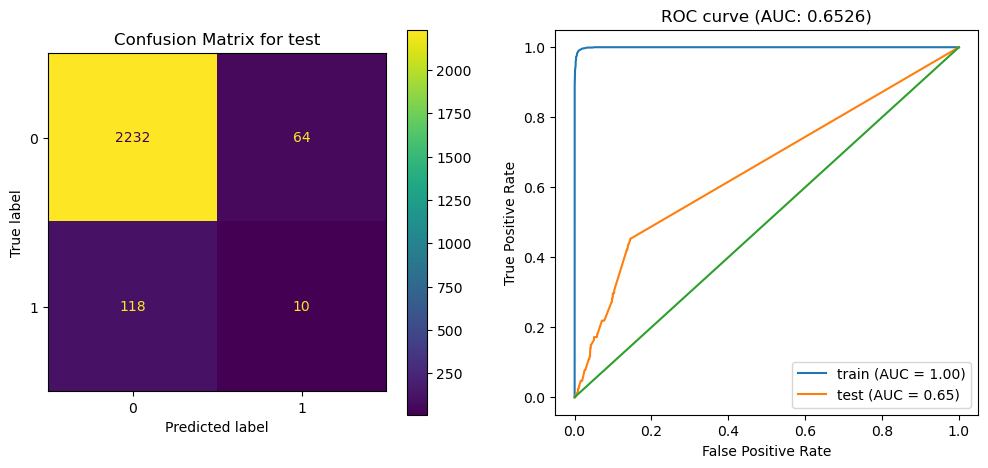

In [104]:
evaluate(bag)

In [105]:
print(classification_report(y_val,bag.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2296
           1       0.14      0.08      0.10       128

    accuracy                           0.92      2424
   macro avg       0.54      0.53      0.53      2424
weighted avg       0.91      0.92      0.92      2424



## KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier()
knn.fit(Xsm_train,ysm_train)

KNeighborsClassifier()

In [108]:
knn.score(Xsm_train,ysm_train)# Train accuracy

0.9352335364084712

In [109]:
knn.score(X_val_scaled,y_val) # Validation accuracy

0.823019801980198

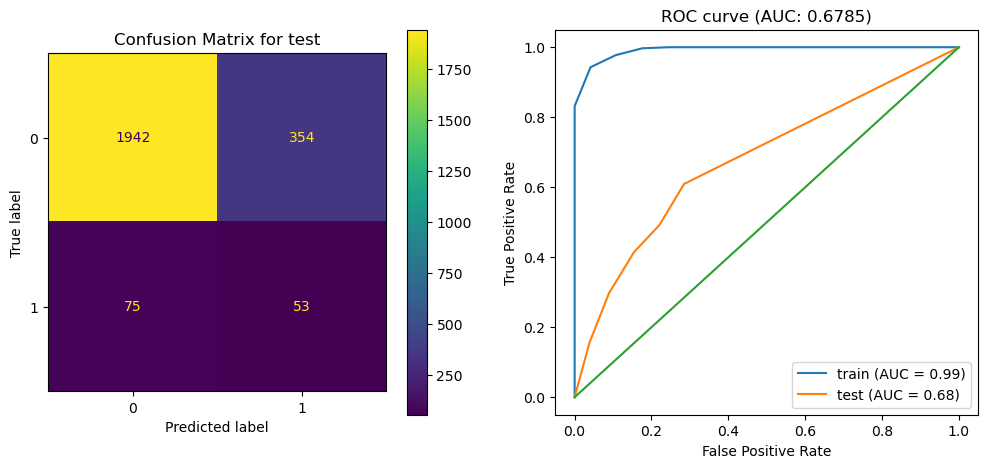

In [110]:
evaluate(knn)

In [111]:
print(classification_report(y_val,knn.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2296
           1       0.13      0.41      0.20       128

    accuracy                           0.82      2424
   macro avg       0.55      0.63      0.55      2424
weighted avg       0.92      0.82      0.86      2424



## Logistic Regression with GridSearch

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
pipe_lr = Pipeline([
        #('sampling', SMOTE(random_state=42)),
        ('lr', LogisticRegression(solver='newton-cg'))
    ])

# Hyperparameters
lr_params = {
    'lr__C': np.linspace(-3, 3, 7),
    'lr__penalty': ['l1', 'l2']
}

In [114]:
gs_lr = GridSearchCV(pipe_lr, param_grid = lr_params, cv=10,
                     scoring='roc_auc',n_jobs=-1,
                     verbose=1)

# Fit GridSearch to training data.
gs_lr.fit(Xsm_train, ysm_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


C:\Users\yodchan\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yodchan\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yodchan\AppData\Local\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\yodchan\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lr',
                                        LogisticRegression(solver='newton-cg'))]),
             n_jobs=-1,
             param_grid={'lr__C': array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
                         'lr__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

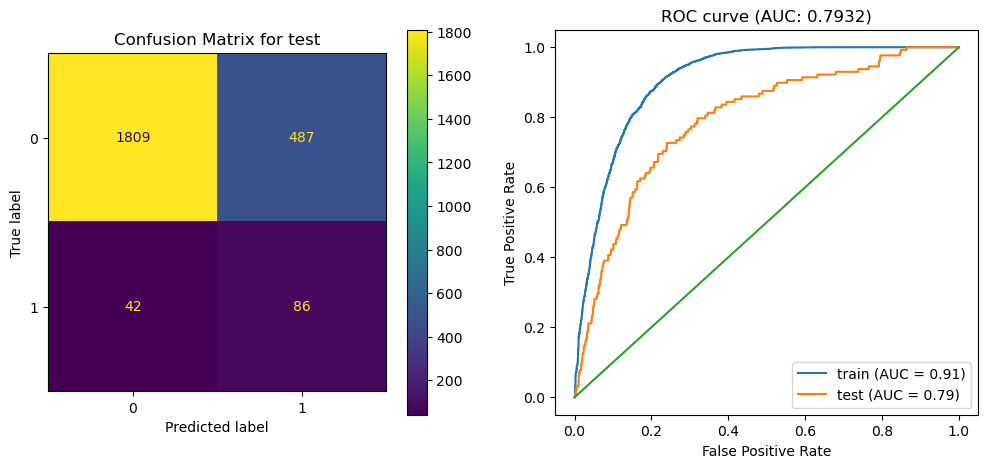

In [115]:
evaluate(gs_lr)

In [116]:
gs_lr.score(Xsm_train,ysm_train)# Train accuracy

0.9093428976176945

In [117]:
gs_lr.score(X_val_scaled,y_val) # Validation accuracy

0.7931831173780488

In [118]:
print(classification_report(y_val,gs_lr.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      2296
           1       0.15      0.67      0.25       128

    accuracy                           0.78      2424
   macro avg       0.56      0.73      0.56      2424
weighted avg       0.93      0.78      0.84      2424



## SVM

In [119]:
from sklearn.svm import SVC

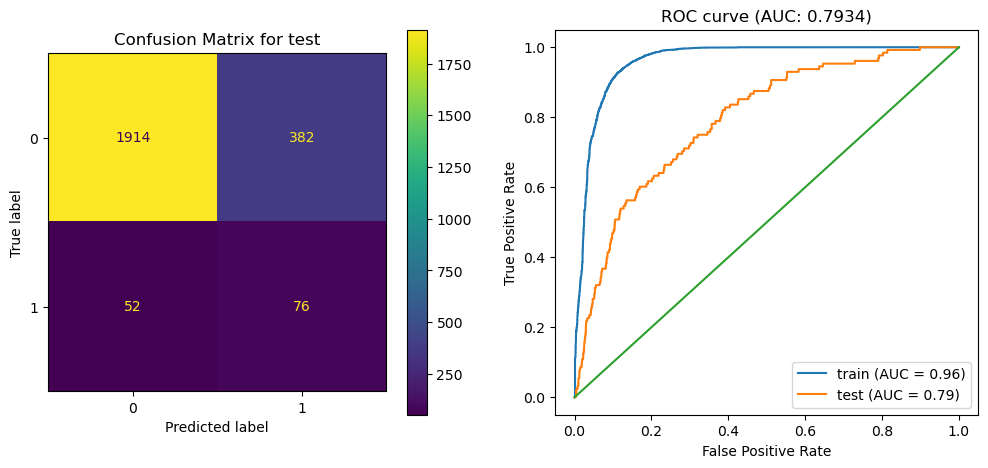

In [120]:
svc = SVC(probability=True, degree=2)
svc.fit(Xsm_train, ysm_train)
evaluate(svc)

In [121]:
svc.score(Xsm_train,ysm_train)# Train accuracy

0.9001305483028721

In [122]:
svc.score(X_val_scaled,y_val) # Validation accuracy

0.820957095709571

In [123]:
print(classification_report(y_val,svc.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2296
           1       0.17      0.59      0.26       128

    accuracy                           0.82      2424
   macro avg       0.57      0.71      0.58      2424
weighted avg       0.93      0.82      0.86      2424

